## Marching Squares

In [2]:
import numpy as np
import plotly.graph_objects as go

In [2]:
def marching_squares(func, canvas: np.ndarray, num_div: float = 4, isovalue: float = 1, cell_width: int = 50, color = 'rgb(0, 0, 255)', thickness: int = 2) -> None:

    width = canvas.shape[1]//cell_width
    height = canvas.shape[0]//cell_width

    grid = np.zeros((width, height))

    fig = go.Figure()

    for i in range(width):
        for j in range(height):
            grid[i][j] = func(1/num_div * (i - width//2), 1/num_div * (j - height//2))
            # width//2 y height//2 es para centrar la figura

    def linear_interpolation(a: float, b: float) -> float:
        return abs((isovalue - a)/(a - b))

    def draw(p1: tuple, p2: tuple):
        fig.add_trace(go.Scatter(x=[p1[0] - width//2, p2[0]- width//2], y=[p1[1]- height//2, p2[1]- height//2], mode='lines', line=dict(color=color), showlegend=False))
        
    for w in range(width - 1):
        for h in range(height - 1):
            cell = [0, 0, 0, 0]
            
            c0 = grid[w][h]
            c1 = grid[w + 1][h]
            c2 = grid[w + 1][h + 1]
            c3 = grid[w][h + 1]

            if c0 > isovalue: cell[0] = 1
            if c1 > isovalue: cell[1] = 1
            if c2 > isovalue: cell[2] = 1
            if c3 > isovalue: cell[3] = 1

            if cell == [0, 0, 0, 0] or cell == [1, 1, 1, 1]:
                pass
            elif cell == [0, 0, 0, 1]:
                    d1 = linear_interpolation(c3, c2)
                    d2 = linear_interpolation(c0, c3)
                    draw((w + d1, h + 1), (w, h + d2))
            elif cell == [0, 0, 1, 0]:
                    d1 = linear_interpolation(c3, c2)
                    d2 = linear_interpolation(c1, c2)
                    draw((w + d1, h + 1), (w + 1, h + d2))
            elif cell == [0, 0, 1, 1] or cell == [1, 1, 0, 0]:
                    d1 = linear_interpolation(c0, c3)
                    d2 = linear_interpolation(c1, c2)
                    draw((w, h + d1), (w + 1, h + d2))
            elif cell == [0, 1, 0, 0] or cell == [1, 0, 1, 1]:
                    d1 = linear_interpolation(c0, c1)
                    d2 = linear_interpolation(c1, c2)
                    draw((w + d1, h), (w + 1, h + d2))
            elif cell == [0, 1, 0, 1]:
                    d1 = linear_interpolation(c0, c1)
                    d2 = linear_interpolation(c1, c2)
                    d3 = linear_interpolation(c3, c2)
                    d4 = linear_interpolation(c0, c3)
                    draw((w, h + d4), (w + d1, h))
                    draw((w + d3, h + 1), (w + 1, h + d2))
            elif cell == [0, 1, 1, 0] or cell == [1, 0, 0, 1]:
                    d1 = linear_interpolation(c0, c1)
                    d2 = linear_interpolation(c3, c2)
                    draw((w + d1, h), (w + d2, h + 1))
            elif cell == [0, 1, 1, 1] or cell == [1, 0, 0, 0]:
                    d1 = linear_interpolation(c0, c1)
                    d2 = linear_interpolation(c0, c3)
                    draw((w, h + d2), (w + d1, h))
            elif cell == [1, 0, 1, 0]:
                    d1 = linear_interpolation(c0, c1)
                    d2 = linear_interpolation(c1, c2)
                    d3 = linear_interpolation(c3, c2)
                    d4 = linear_interpolation(c0, c3)
                    draw((w + d1, h), (w + 1, h + d2))
                    draw((w, h + d4), (w + d3, h + 1))
            elif cell == [1, 1, 0, 1]:
                    d1 = linear_interpolation(c1, c2)
                    d2 = linear_interpolation(c3, c2)
                    draw((w + d2, h + 1), (w + 1, h + d1))
            elif cell == [1, 1, 1, 0]:
                    d1 = linear_interpolation(c0, c3)
                    d2 = linear_interpolation(c3, c2)
                    draw((w, h + d1), (w + d2, h + 1))
    fig.update_layout(
        margin=dict(l=25, r=25, t=25, b=25),
        paper_bgcolor="LightSteelBlue", width=500, height=500)
    fig.update_xaxes(dtick=1, showticklabels=False)
    fig.update_yaxes(dtick=1, showticklabels=False)
    fig.show()

In [3]:
blank = np.zeros((500, 500), dtype='uint8')

marching_squares(lambda x, y: x**2 + y**2, blank, 4, 1)


## Marching Tethra

In [10]:
def marching_tethra(func, canvas: np.ndarray, num_div: float = 4, cell_width: int = 50, isovalue: float = 1, color = [0, 0, 0]) -> None:

    height = canvas.shape[0]
    width = canvas.shape[1]
    deep = canvas.shape[2]


    grid = np.zeros((width, height, deep))

    fig = go.Figure()

    for i in range(width):
        for j in range(height):
            for k in range(height):
                grid[i][j][k] = func(1/num_div * (i - width//2), 1/num_div * (j - height//2), 1/num_div * (k - deep//2))
            # width//2 y height//2 es para centrar la figura
    
    def t_tetra(tetra):
        if(tetra == 0):
                return np.array([1,0,0])
        if(tetra == 1):
                return np.array([0,0,0])
        if(tetra == 2):
                return np.array([0,1,0])
        if(tetra == 3):
                return np.array([1,1,0])
        if(tetra == 4):
                return np.array([1,0,1])
        if(tetra == 5):
                return np.array([0,0,1])
        if(tetra == 6):
                return np.array([0,1,1])
        if(tetra == 7):
                return np.array([1,1,1])

    def move_point(p_inicial, p_objetivo, d):
            # Calcula el vector entre el punto inicial y el punto objetivo
            vec_dir = p_objetivo - p_inicial
            # Normaliza el vector de dirección (lo convierte en un vector unitario)
            vec_uni = vec_dir / np.linalg.norm(vec_dir)
            # Calcula el vector de desplazamiento multiplicando la dirección por la distancia "d"
            vec_desplazamiento = d * vec_uni
            # Calcula las coordenadas del nuevo punto sumando el vector de desplazamiento al punto inicial
            nuevo_punto = p_inicial + vec_desplazamiento

            return nuevo_punto

    def move(i, j, dist):
            p_0 = np.array([w,h,d])
            p_inicial = p_0 + t_tetra(i)
            p_objetivo = p_0 + t_tetra(j)

            return move_point(p_inicial, p_objetivo, dist)


    def linear_interpolation(a: float, b: float) -> float:
        return (a + b)/2

    def draw(p1, p2, p3):
        colors = 'rgb('+str(color[0])+','+str(color[1])+','+str(color[2])+')'
        # Define las coordenadas de los vértices del triángulo
        x = [(p1[0]- width//2)/num_div, (p2[0]- width//2)/num_div, (p3[0]- width//2)/num_div]
        y = [(p1[1]- height//2)/num_div, (p2[1]- height//2)/num_div, (p3[1]- height//2)/num_div]
        z = [(p1[2]- deep//2)/num_div, (p2[2]- deep//2)/num_div, (p3[2]- deep//2)/num_div]

        # Dibuja el triángulo como un objeto go.Mesh3d
        fig.add_trace(go.Mesh3d(x=x, y=y, z=z, opacity=0.5, color=colors))

    def draw_s(p1, p2, p3, p4):
        colors = 'rgb('+str(color[0])+','+str(color[1])+','+str(color[2])+')'
        # Define las coordenadas de los vértices del triángulo
        x = [(p1[0]- width//2)/num_div, (p2[0]- width//2)/num_div, (p3[0]- width//2)/num_div, (p4[0]- width//2)/num_div]
        y = [(p1[1]- height//2)/num_div, (p2[1]- height//2)/num_div, (p3[1]- height//2)/num_div, (p4[1]- height//2)/num_div]
        z = [(p1[2]- deep//2)/num_div, (p2[2]- deep//2)/num_div, (p3[2]- deep//2)/num_div, (p4[2]- deep//2)/num_div]

        # Dibuja el triángulo como un objeto go.Mesh3d
        fig.add_trace(go.Mesh3d(x=x, y=y, z=z, opacity=0.5, color=colors))

    # Aristas del cubo que forman tethraedros que 
    cube = [[0,1,3,4],[1,2,3,6],[4,5,6,1],[4,7,6,3],[4,6,1,3]]

    for w in range(width - 1):
        for h in range(height - 1):
            for d in range(deep - 1):
                # Aristas del cubo
                c = [
                     grid[w + 1][h][d],         #(1,0,0)
                     grid[w][h][d],             #(0,0,0)
                     grid[w][h + 1][d],         #(0,1,0)
                     grid[w + 1][h + 1][d],     #(1,1,0)
                     grid[w + 1][h][d + 1],     #(1,0,1)
                     grid[w][h][d + 1],         #(0,0,1)
                     grid[w][h + 1][d + 1],     #(0,1,1)
                     grid[w + 1][h + 1][d + 1]  #(1,1,1)
                    ]

                for tetra in cube:
                    cell = [0, 0, 0, 0]
                    c0 = c[tetra[0]]
                    c1 = c[tetra[1]]
                    c2 = c[tetra[2]]
                    c3 = c[tetra[3]]

                    if c0 > isovalue: cell[0] = 1
                    if c1 > isovalue: cell[1] = 1
                    if c2 > isovalue: cell[2] = 1
                    if c3 > isovalue: cell[3] = 1
                    
                    if cell == [0, 0, 0, 0] or cell == [1, 1, 1, 1]:
                        pass
                    else:
                        color[0]=color[0]+1
                    if cell == [1, 0, 0, 0] or cell == [0, 1, 1, 1]:
                        d1 = linear_interpolation(c0, c1)
                        d2 = linear_interpolation(c0, c2)
                        d3 = linear_interpolation(c0, c3)
                        draw(move(tetra[0], tetra[1], d1), move(tetra[0], tetra[2], d2), move(tetra[0], tetra[3], d3))
                    if cell == [0, 1, 0, 0] or cell == [1, 0, 1, 1]:
                        d1 = linear_interpolation(c1, c0)
                        d2 = linear_interpolation(c1, c2)
                        d3 = linear_interpolation(c1, c3)
                        draw(move(tetra[1], tetra[0], d1), move(tetra[1], tetra[2], d2), move(tetra[1], tetra[3], d3))
                    if cell == [0, 0, 1, 0] or cell == [1, 1, 0, 1]:
                        d1 = linear_interpolation(c2, c0)
                        d2 = linear_interpolation(c2, c1)
                        d3 = linear_interpolation(c2, c3)
                        draw(move(tetra[2], tetra[0], d1), move(tetra[2], tetra[1], d2), move(tetra[2], tetra[3], d3))
                    if cell == [0, 0, 0, 1] or cell == [1, 1, 1, 0]:
                        d1 = linear_interpolation(c3, c0)
                        d2 = linear_interpolation(c3, c1)
                        d3 = linear_interpolation(c3, c2)
                        draw(move(tetra[3], tetra[0], d1), move(tetra[3], tetra[1], d2), move(tetra[3], tetra[2], d3))
                    
                    if cell == [1, 1, 0, 0] or cell == [0, 0, 1, 1]:
                        d1 = linear_interpolation(c0, c2)
                        d2 = linear_interpolation(c0, c3)
                        d3 = linear_interpolation(c1, c2)
                        d4 = linear_interpolation(c1, c3)
                        draw_s(move(tetra[0], tetra[2], d1), move(tetra[0], tetra[3], d2), move(tetra[1], tetra[2], d3), move(tetra[1], tetra[3], d4))
                    if cell == [1, 0, 1, 0] or cell == [0, 1, 0, 1]:
                        d1 = linear_interpolation(c0, c1)
                        d2 = linear_interpolation(c0, c3)
                        d3 = linear_interpolation(c2, c1)
                        d4 = linear_interpolation(c2, c3)
                        draw_s(move(tetra[0], tetra[1], d1), move(tetra[0], tetra[3], d2), move(tetra[2], tetra[1], d3), move(tetra[2], tetra[3], d4))
                    if cell == [1, 0, 0, 1] or cell == [0, 1, 1, 0]:
                        d1 = linear_interpolation(c0, c2)
                        d2 = linear_interpolation(c0, c1)
                        d3 = linear_interpolation(c3, c2)
                        d4 = linear_interpolation(c3, c1)
                        draw_s(move(tetra[0], tetra[2], d1), move(tetra[0], tetra[1], d2), move(tetra[3], tetra[2], d3), move(tetra[3], tetra[1], d4))
    fig.show()

In [11]:
n = 50
blank = np.zeros((n, n, n), dtype='uint8')

def esfera(x, y, z, r=2):
    return (r - np.sqrt(x**2 + y**2 + z**2))

marching_tethra(esfera, blank, isovalue=0, num_div=1)


In [3]:
blank = np.zeros((1500, 1500, 1500), dtype='uint8')
R = 2
r = 1
marching_tethra(lambda x, y, z: x**2 + y**2 + z**2 + R**2 - r**2 -2*R*np.sqrt(x**2+y**2), blank, 3)


In [7]:
fig = go.Figure()

def draw_triangle(p1, p2, p3, color):
    # Define las coordenadas de los vértices del triángulo
    x = [p1[0], p2[0], p3[0]]
    y = [p1[1], p2[1], p3[1]]
    z = [p1[2], p2[2], p3[2]]

    # Dibuja el triángulo como un objeto go.Mesh3d
    fig.add_trace(go.Mesh3d(x=x, y=y, z=z, opacity=0.5, color=color))

def draw_tethra(p0, p1, p2, p3, color):
    draw_triangle(p0, p1, p2, color)
    draw_triangle(p3, p1, p0, color)
    draw_triangle(p0, p2, p3, color)
    draw_triangle(p1, p2, p3, color)

def draw_s(p1, p2, p3, p4, color):
        # Define las coordenadas de los vértices del triángulo
        x = [p1[0], p2[0], p3[0], p4[0]]
        y = [p1[1], p2[1], p3[1], p4[1]]
        z = [p1[2], p2[2], p3[2], p4[2]]

        # Dibuja el triángulo como un objeto go.Mesh3d
        fig.add_trace(go.Mesh3d(x=x, y=y, z=z, opacity=0.5, color=color))

p0 = np.array([1,0,0])
p1 = np.array([0,0,0])
p2 = np.array([0,1,0])
p3 = np.array([1,1,0])
p4 = np.array([1,0,1])
p5 = np.array([0,0,1])
p6 = np.array([0,1,1])
p7 = np.array([1,1,1])

draw_tethra(p0, p1, p3, p4, 'blue')
draw_tethra(p1, p2, p3, p6, 'red')
draw_tethra(p4, p6, p7, p3, 'pink')
draw_tethra(p4, p6, p5, p1, 'green')


#fig.update_layout(scene=dict(xaxis_range=[-1, 2], yaxis_range=[-1, 2], zaxis_range=[-1, 2]))

fig.show()

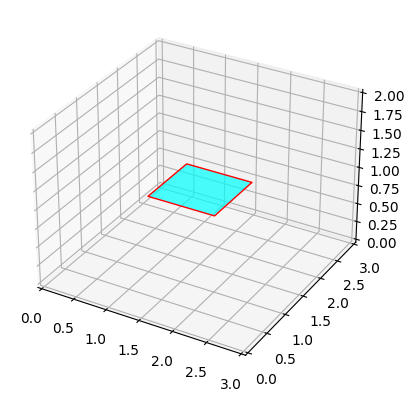

In [85]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import numpy as np

# Definir los vértices del cuadrado en coordenadas (x, y, z)
x = [1, 2, 2, 1]
y = [1, 1, 2, 2]
z = [1, 1, 1, 1]

# Crear una figura 3D y un subplot 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Crear el cuadrado
cuadrado = [[x[0], y[0], z[0]],
            [x[1], y[1], z[1]],
            [x[2], y[2], z[2]],
            [x[3], y[3], z[3]]]

# Crear una colección de cuadrados (un solo cuadrado en este caso)
cuadrados = [cuadrado]

# Agregar la colección de cuadrados a la figura
ax.add_collection3d(Poly3DCollection(cuadrados, facecolors='cyan', edgecolors='r', linewidths=1, alpha=0.7))

# Ampliar la vista (ajustar los límites de los ejes)
ax.set_xlim(min(x) - 1, max(x) + 1)
ax.set_ylim(min(y) - 1, max(y) + 1)
ax.set_zlim(min(z) - 1, max(z) + 1)

# Mostrar el gráfico
plt.show()

